### Callback Functions Assignment


Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


Q2. Load the Wine Quality dataset and explore its dimensions.


In [2]:
# Q2. Load the Wine Quality dataset and explore its dimensions
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Display dimensions
print("Dimensions of the dataset:", wine_data.shape)

Dimensions of the dataset: (1599, 12)


Q3. Check for null values, identify categorical variables, and encode them.

In [3]:
print("Null values in the dataset:")
print(wine_data.isnull().sum())

# Identify categorical variables
categorical_cols = wine_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables:", categorical_cols)

# Encode categorical variables
wine_data_encoded = pd.get_dummies(wine_data, columns=categorical_cols, drop_first=True)


Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables: []


Q4. Separate the features and target variables from the dataframe.

In [4]:
X = wine_data_encoded.drop(columns=['quality'])
y = wine_data_encoded['quality']

Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Q6. Perform scaling on the dataset.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

Q8. Create a Sequential model and add all the layers to

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [8]:
from keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs")

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [9]:
from keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [10]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

Q12. Print the model summary.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [16]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback]
)


Epoch 1/20
32/32 [==============================] - 3s 16ms/step - loss: -4.4323 - accuracy: 0.0000e+00 - val_loss: -9.3804 - val_accuracy: 0.0000e+00
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: -17.1685 - accuracy: 0.0000e+00 - val_loss: -26.7612 - val_accuracy: 0.0000e+00
Epoch 3/20
32/32 [==============================] - 0s 6ms/step - loss: -43.1243 - accuracy: 0.0000e+00 - val_loss: -63.1829 - val_accuracy: 0.0000e+00
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: -94.5734 - accuracy: 0.0000e+00 - val_loss: -131.5063 - val_accuracy: 0.0000e+00
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: -185.8750 - accuracy: 0.0000e+00 - val_loss: -247.1226 - val_accuracy: 0.0000e+00
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: -333.5081 - accuracy: 0.0000e+00 - val_loss: -428.1923 - val_accuracy: 0.0000e+00
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: -555.5016 - 

Q16. Get the model's parameters.

In [23]:
model_parameters = model.get_weights()


Q17. Store the model's training history as a Pandas DataFrame.

In [20]:
history_df = pd.DataFrame(history.history)

Q18. Plot the model's training history.

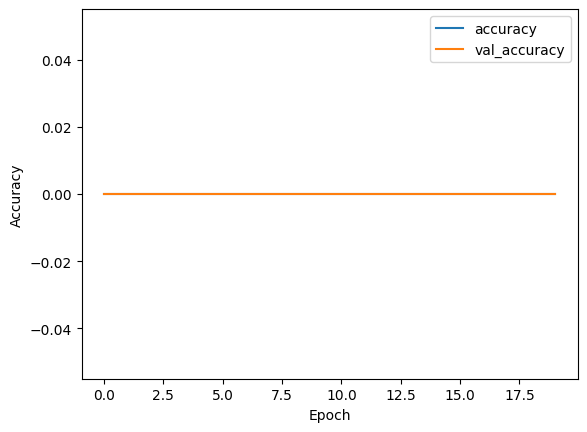

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Q19. Evaluate the model's performance using the test data.

In [22]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

10/10 [==============================] - 0s 4ms/step - loss: -19378.9629 - accuracy: 0.0000e+00
Test Accuracy: 0.0
